영화 추천 시스템 구축 및 결과 보고서 작성

랜덤한 3명을 추첨, 그 사람의 인생을 바꿀 영화를 각각 4편씩 선정하여 추천해준다.
상사는 기본적인건 알지만 자세한 코딩은 할 줄 모릅니다.
일일히 코드 안보여줘도 되고 어떤 방식으로 추천했는지만 정리하세요
아무 dataset이나 사용해도 됩니다.

나이/성별/직업/지역/장르 아무거나 해도 됨. 알아서 추천하세여

---

당첨자 뽑기 - 리뷰 몇개 이상.

추천할 영화 기준 정하기.....

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [188]:
# 데이터 가져오기
rating_df = pd.read_csv('u.data', sep='\t', header = None)
rating_df.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
user_df = pd.read_csv('u.user', sep='|', header = None)
user_df.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
movie_df = pd.read_csv('u.item', sep = '|', encoding='latin1', header = None)
movie_df.columns = ['movie_id' , 'movie_title' , 'release_date' , 'video_release_date' ,
              'IMDb_URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']

In [177]:
rating_df.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
user_df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [189]:
# 필요 없는 컬럼 삭제
movie_df = movie_df.drop(['video_release_date', 'IMDb_URL'], axis = 1)
movie_df.head()

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [190]:
# 영화 dataFrame에 해당 영화 평균 평점 추가
avgrat = rating_df.groupby('movie_id').mean().reset_index()[['movie_id', 'rating']]
movie_df = movie_df.merge(avgrat, on = 'movie_id')
movie_df

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3.878319
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.206107
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.033333
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.550239
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3.302326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
1678,1679,B. Monkey (1998),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,3.000000
1679,1680,Sliding Doors (1998),01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2.000000
1680,1681,You So Crazy (1994),01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3.000000


In [193]:
# 추후 사용하기 위해 장르만 있는 리스트 생성
genreKey = movie_df.columns[5:-1]
genreKey

Index(['Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [159]:
# 리뷰를 50회 이상 남긴 사람 중 3명을 추첨
user_unq = rating_df.groupby('user_id').count()[['movie_id']].sort_values('movie_id')
freq_p = user_unq[user_unq['movie_id'] > 50]

target = freq_p.sample(n = 3)
# 621 633 716
target

,movie_id
user_id,
57,106
217,76
177,115


array([[<Axes: title={'center': 'movie_id'}>]], dtype=object)

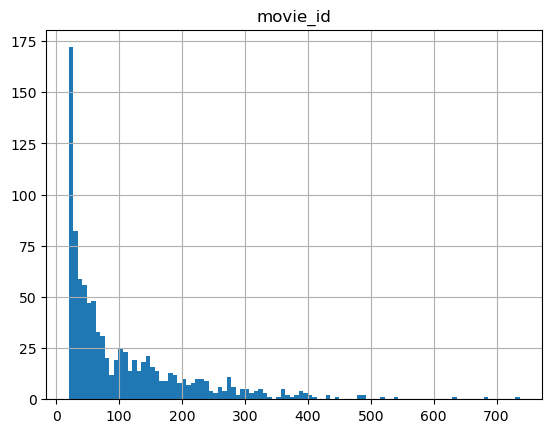

In [255]:
user_unq.hist(bins = 100)

In [199]:
# 추첨된 사람들의 영화 리뷰 뽑기, 필요한 데이터만 정제
review_621 = rating_df[rating_df['user_id'] == 621].sort_values('movie_id').reset_index()[['user_id', 'movie_id']]
review_633 = rating_df[rating_df['user_id'] == 633].sort_values('movie_id').reset_index()[['user_id', 'movie_id']]
review_716 = rating_df[rating_df['user_id'] == 716].sort_values('movie_id').reset_index()[['user_id', 'movie_id']]
review_621

,user_id,movie_id
0,621,1
1,621,2
2,621,3
3,621,4
4,621,7
...,...,...
166,621,1047
167,621,1093
168,621,1118
169,621,1185


In [266]:
# 당첨자들의 본 영화의 장르 갯수를 세기 위해 장르만 추출
genre_621 = movie_df[movie_df['movie_id'].isin(review_621['movie_id'])][genreKey]
genre_633 = movie_df[movie_df['movie_id'].isin(review_633['movie_id'])][genreKey]
genre_716 = movie_df[movie_df['movie_id'].isin(review_716['movie_id'])][genreKey]

,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1092,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1117,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1184,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [219]:
# 621 사람에게 추천할 영화 후보
genre_621.sum().sort_values(ascending = False) # 가장 많이 본 장르 : Comedy, Action
# 장르가 comedy이고 Action이면서 당첨자가 보지 않은 영화이고, 
# 평균 평점으로 내림차순 정렬한 DataFrame
rcmd_621 = movie_df[(movie_df['Comedy'] == 1) & (movie_df['Action'] == 1) & ~(movie_df['movie_id'].isin(review_621['movie_id']))].sort_values('rating', ascending = False)

In [220]:
# 633 사람에게 추천할 영화 후보
genre_633.sum().sort_values(ascending = False) # 가장 많이 본 장르 : Action, Thriller
# 장르가 comedy이고 Action이면서 당첨자가 보지 않은 영화이고, 
# 평균 평점으로 내림차순 정렬한 DataFrame
rcmd_633 = movie_df[(movie_df['Thriller'] == 1) & (movie_df['Action'] == 1) & ~(movie_df['movie_id'].isin(review_633['movie_id']))].sort_values('rating', ascending = False)

In [221]:
# 716 사람에게 추천할 영화 후보
genre_716.sum().sort_values(ascending = False) # 가장 많이 본 장르 : Drama, Comedy
# 장르가 comedy이고 Action이면서 당첨자가 보지 않은 영화이고, 
# 평균 평점으로 내림차순 정렬한 DataFrame
rcmd_716 = movie_df[(movie_df['Drama'] == 1) & (movie_df['Comedy'] == 1) & ~(movie_df['movie_id'].isin(review_716['movie_id']))].sort_values('rating', ascending = False)
rcmd_716

,movie_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
315,316,As Good As It Gets (1997),23-Dec-1997,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.196429
169,170,Cinema Paradiso (1988),01-Jan-1988,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,4.173554
44,45,Eat Drink Man Woman (1994),01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4.050000
511,512,Wings of Desire (1987),01-Jan-1987,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,4.000000
7,8,Babe (1995),01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,3.995434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1339,Stefano Quantestorie (1993),01-Jan-1993,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.000000
1556,1557,Yankee Zulu (1994),16-Feb-1996,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.000000
1568,1569,"Vie est belle, La (Life is Rosey) (1987)",01-Jan-1987,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.000000
1625,1626,Nobody Loves Me (Keiner liebt mich) (1994),09-Feb-1996,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.000000


<Axes: title={'center': 'Most Viewed Movie Genres - 621'}>

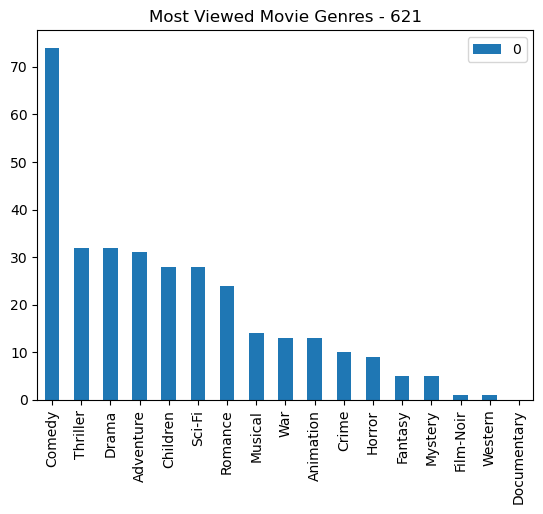

In [260]:
pd.DataFrame(genre_621.sum().sort_values(ascending = False)).plot.bar(title = 'Most Viewed Movie Genres - 621')

<Axes: title={'center': 'Most Viewed Movie Genres - 633'}>

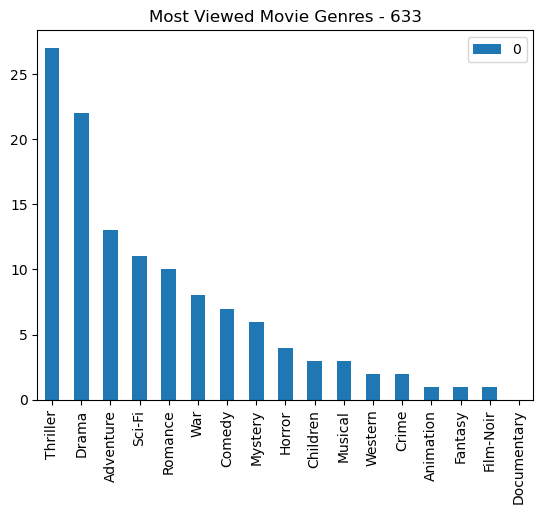

In [261]:
pd.DataFrame(genre_633.sum().sort_values(ascending = False)).plot.bar(title = 'Most Viewed Movie Genres - 633')

<Axes: title={'center': 'Most Viewed Movie Genres - 716'}>

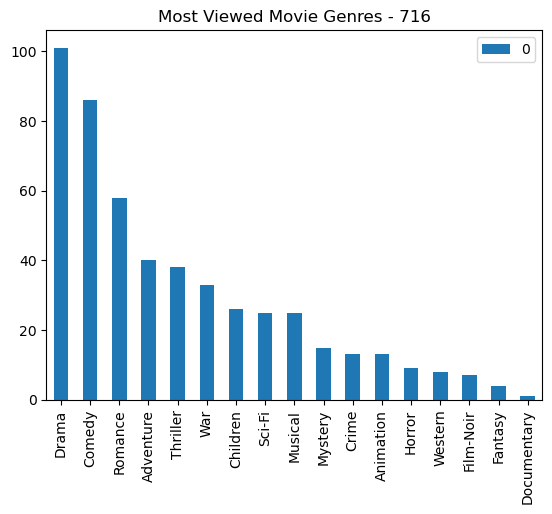

In [262]:
pd.DataFrame(genre_716.sum().sort_values(ascending = False)).plot.bar(title = 'Most Viewed Movie Genres - 716')

<Axes: title={'center': 'Average Rating by Genre'}>

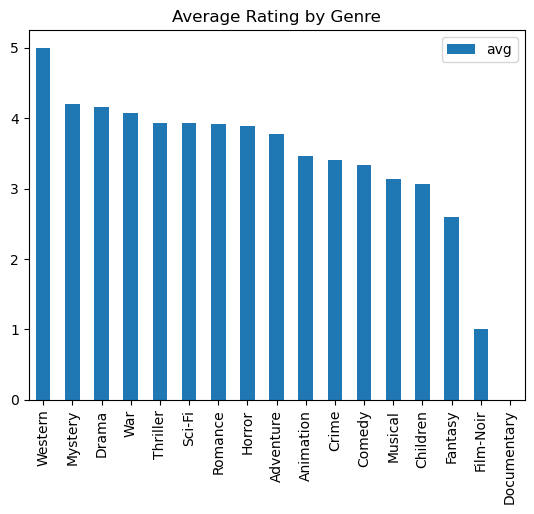

In [263]:
# 장르별 평균 평점
avgList = []
tmp = rating_df[rating_df['user_id'] == 621].merge(movie_df, on = 'movie_id')
for gen in genreKey:
    avgList.append(tmp[tmp[gen] == 1]['rating_x'].mean())
    
avgDf = pd.DataFrame(avgList, index = genreKey, columns = ['avg']).sort_values('avg', ascending = False)
avgDf.plot.bar(title = 'Average Rating by Genre')

<Axes: title={'center': 'Average Rating by Genre'}>

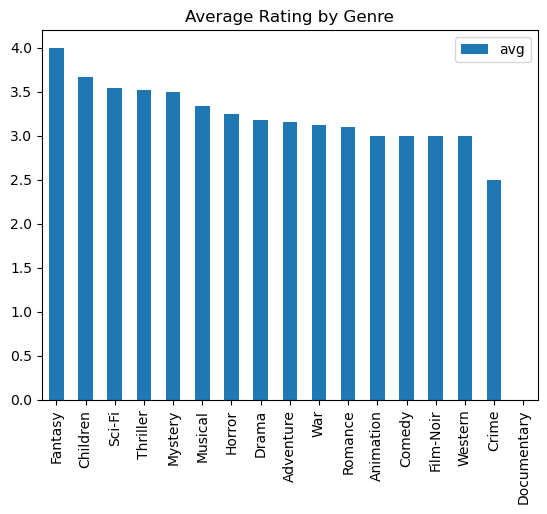

In [264]:
# 장르별 평균 평점
avgList = []
tmp = rating_df[rating_df['user_id'] == 633].merge(movie_df, on = 'movie_id')
for gen in genreKey:
    avgList.append(tmp[tmp[gen] == 1]['rating_x'].mean())
    
avgDf = pd.DataFrame(avgList, index = genreKey, columns = ['avg']).sort_values('avg', ascending = False)
avgDf.plot.bar(title = 'Average Rating by Genre')

<Axes: title={'center': 'Average Rating by Genre'}>

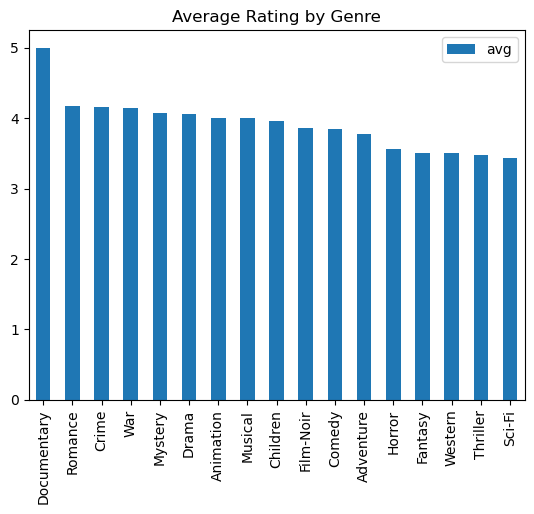

In [265]:
# 장르별 평균 평점
avgList = []
tmp = rating_df[rating_df['user_id'] == 716].merge(movie_df, on = 'movie_id')
for gen in genreKey:
    avgList.append(tmp[tmp[gen] == 1]['rating_x'].mean())
    
avgDf = pd.DataFrame(avgList, index = genreKey, columns = ['avg']).sort_values('avg', ascending = False)
avgDf.plot.bar(title = 'Average Rating by Genre')

In [259]:
# 각각 평균 평점 상위 4개씩 출력
print(rcmd_621[:4]['movie_title'])
print(rcmd_633[:4]['movie_title'])
print(rcmd_716[:4]['movie_title'])

434     Butch Cassidy and the Sundance Kid (1969)
185                    Blues Brothers, The (1980)
200                           Evil Dead II (1987)
1137                              Best Men (1997)
Name: movie_title, dtype: object
143                     Die Hard (1988)
264    Hunt for Red October, The (1990)
683          In the Line of Fire (1993)
297                     Face/Off (1997)
Name: movie_title, dtype: object
315     As Good As It Gets (1997)
169        Cinema Paradiso (1988)
44     Eat Drink Man Woman (1994)
511        Wings of Desire (1987)
Name: movie_title, dtype: object
